In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import csv
import pandas as pd
import matplotlib
import seaborn as sns


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [6]:

d = pd.read_csv('HDS.csv')
d.head(5)
d.describe()
d.info()
print(d["HeartDisease"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
[0 1]


In [7]:
scaler = MinMaxScaler()
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
d[numeric_columns] = scaler.fit_transform(d[numeric_columns])

binary_columns = ['Gender', 'ExerciseAngina']
for column in binary_columns:
    d[column] = LabelEncoder().fit_transform(d[column])

nominal_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
nominal_encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_nominal = pd.DataFrame(
    nominal_encoder.fit_transform(d[nominal_columns]),
    columns=nominal_encoder.get_feature_names_out(nominal_columns)
)

d = pd.concat([d.drop(columns=nominal_columns), encoded_nominal], axis=1)

d.to_csv('HDS_pp.csv', index=False)


In [8]:
predictors = d.drop(['HeartDisease'], axis=1)
target = d["HeartDisease"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
X_test.shape

(734, 15)


(184, 15)

In [9]:

# Create Gaussian Naive Bayes object
classifer = GaussianNB()
# Train model
model = classifer.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Create Gaussian Naive Bayes object
classifer = GaussianNB()
# Train model
model = classifer.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))



The accuracy is83.69565217391305%
[[60 17]
 [13 94]]
The accuracy is83.69565217391305%
[[60 17]
 [13 94]]


              precision    recall  f1-score   support

     class 0       0.82      0.78      0.80        77
     class 1       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



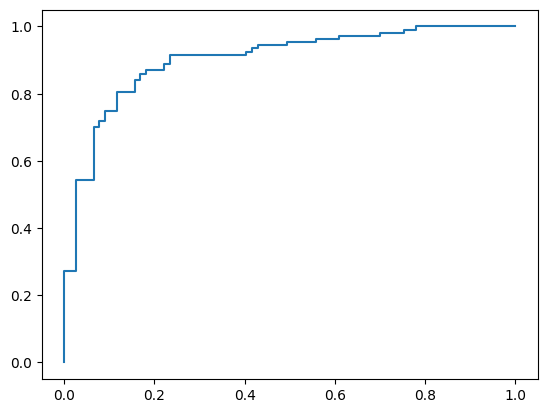

In [10]:
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,
target_names=target_names))

fpr, tpr, _ = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics.auc(fpr, tpr):.2f})')